In this notebook I will implement a long short term memory (LSTM) neural network to predict the closing stock price of a corporation (Apple) using the past 60 day stock price.

In [2]:
# Import libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# get the stock quote
df = yf.Ticker('AAPL').history(period='10y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-08-18 00:00:00-04:00,21.862497,22.057838,21.749290,22.011223,190288000,0.00,0.0
2014-08-19 00:00:00-04:00,22.066714,22.348624,22.046735,22.315327,277596000,0.00,0.0
2014-08-20 00:00:00-04:00,22.295349,22.439633,22.186579,22.324205,210796000,0.00,0.0
2014-08-21 00:00:00-04:00,22.324205,22.406337,22.222096,22.326426,133912000,0.00,0.0
2014-08-22 00:00:00-04:00,22.262054,22.523987,22.239857,22.490690,176736000,0.00,0.0
...,...,...,...,...,...,...,...
2024-08-12 00:00:00-04:00,216.070007,219.509995,215.600006,217.529999,38028100,0.25,0.0
2024-08-13 00:00:00-04:00,219.009995,221.889999,219.009995,221.270004,44155300,0.00,0.0
2024-08-14 00:00:00-04:00,220.570007,223.029999,219.699997,221.720001,41960600,0.00,0.0


In [9]:
df.shape

(2517, 7)

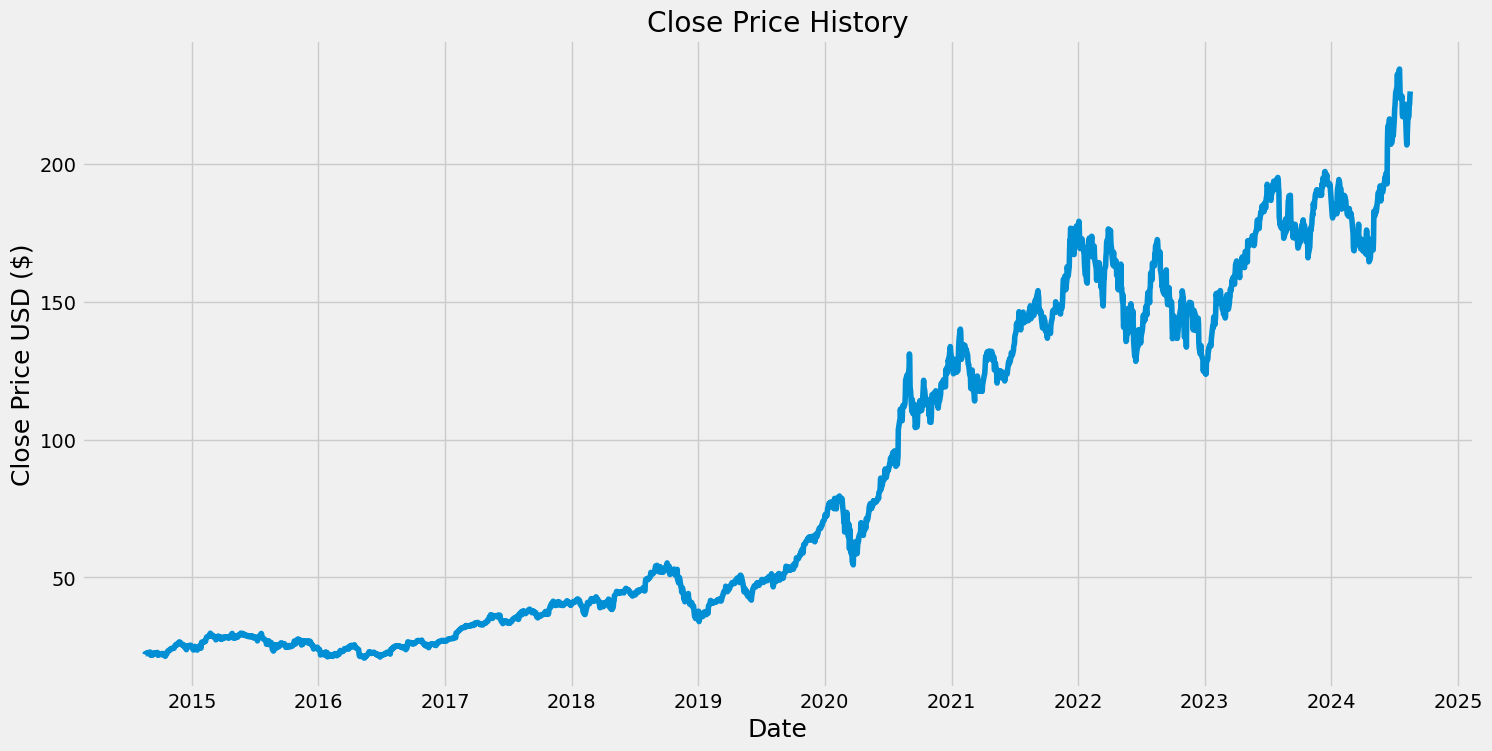

In [10]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()